# Importing libs

In [42]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [43]:
sub=pd.read_csv('submission.csv',parse_dates=['SUBMISSION_DATE']).rename(columns={'SUBMISSION_DATE':'Date'})
acpt=pd.read_csv('accepted.csv',parse_dates=['ACCEPTED_DATE']).rename(columns={'ACCEPTED_DATE':'Date'})
rej=pd.read_csv('rejected.csv',parse_dates=['REJECTED_DATE']).rename(columns={'REJECTED_DATE':'Date'})

In [44]:
df=sub.merge(acpt,on='Date').merge(rej,on='Date')

In [45]:
sub

,SUBMISSIONS,Date
0,58547,2019-01-01
1,51664,2019-02-01
2,56936,2019-03-01
3,57055,2019-04-01
4,59011,2019-05-01
5,54036,2019-06-01
6,61063,2019-07-01
7,57169,2019-08-01
8,55725,2019-09-01
9,59721,2019-10-01


<AxesSubplot:xlabel='Date'>

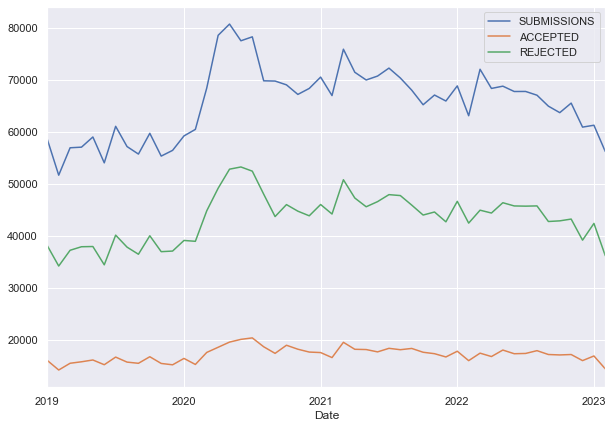

In [46]:
df.plot(x='Date',figsize=(10,7))

In [47]:
#sub['movingAverage']=sub.SUBMISSIONS.rolling(2).mean().shift(1)

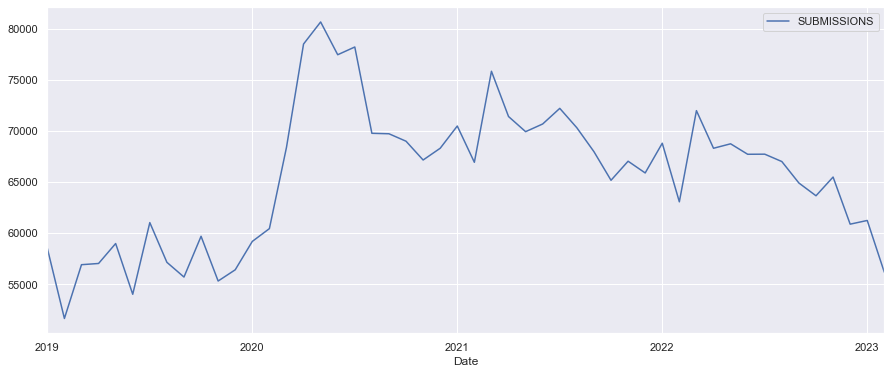

In [48]:
sub.plot(x='Date',figsize=(15,6));

In [49]:
def mape(y, pred):
    diff=pred-y
    pct=diff*100/y
    absPct=np.abs(pct)
    return np.mean(absPct)
    

In [50]:
#mape(sub.SUBMISSIONS.iloc[3:],sub.movingAverage.iloc[3:])

In [51]:
#mse = mean_squared_error(sub.SUBMISSIONS.iloc[3:],sub.movingAverage.iloc[3:])
#mse

In [52]:
df2=pd.read_csv('submissionCountryPlatform.csv',date_parser=['SUBMISSION_DATE'])

In [53]:
df2.head()

,SUBMISSIONS,COUNTRY_CODE,PLATFORM_SITE,SUBMISSION_DATE
0,1,ES,ScholarOneSPA,2019-01-01
1,2,UA,Editorial ManagerCHEMSELECT,2019-01-01
2,1,MA,ScholarOneQUA,2019-01-01
3,6,MY,ScholarOneJFPP,2019-01-01
4,1,IT,ScholarOneJERD,2019-01-01


In [54]:
df2=df2[df2.SUBMISSION_DATE<'2023-03-01']

In [55]:
df2[["COUNTRY_CODE","PLATFORM_SITE"]].value_counts()

COUNTRY_CODE  PLATFORM_SITE                    
IT            ScholarOneMDS                        50
US            Editorial ManagerADVHEALTHMAT        50
              Editorial ManagerADVOPTICALMAT       50
JP            ScholarOnePBC                        50
US            Editorial ManagerADVMATTECHNOL       50
                                                   ..
MD            Editorial ManagerIJG                  1
              Editorial ManagerMINF                 1
              Editorial ManagerPARTICLE-JOURNAL     1
              Editorial ManagerPSSA-JOURNAL         1
ZW            ScholarOneZPH                         1
Length: 100218, dtype: int64

In [56]:
df2[df2.PLATFORM_SITE=='ScholarOneJSFA-WILEY'].COUNTRY_CODE.value_counts()

ES    50
IR    50
MY    50
PL    50
BR    50
      ..
SD     1
DO     1
SS     1
BA     1
AD     1
Name: COUNTRY_CODE, Length: 120, dtype: int64

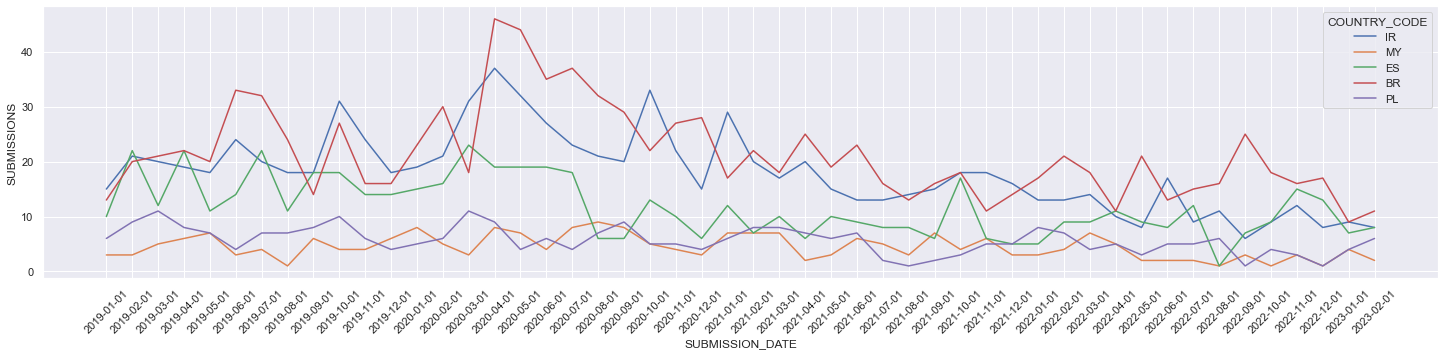

In [57]:
plt.figure(figsize=(25,5))
sns.lineplot(data=df2[(df2.PLATFORM_SITE=='ScholarOneJSFA-WILEY') & df2.COUNTRY_CODE.isin(['ES','IR','MY','PL','BR'])],x='SUBMISSION_DATE',y='SUBMISSIONS',hue="COUNTRY_CODE")
plt.xticks(rotation=45);

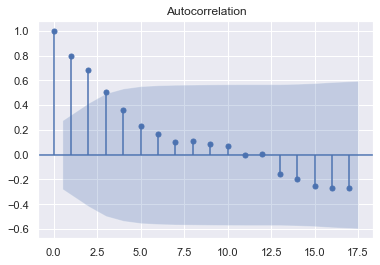

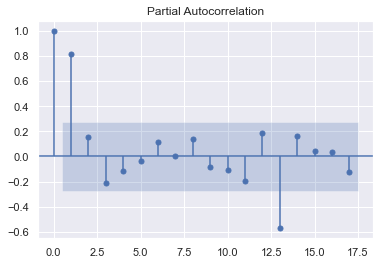

In [58]:
plot_acf(sub.SUBMISSIONS);
plot_pacf(sub.SUBMISSIONS);

In [59]:
subCopy=sub.set_index('Date')

In [60]:
testsize=6
train =subCopy.iloc[:-testsize]
test=subCopy.iloc[len(train):]

In [61]:
subDiff=train.diff().dropna()

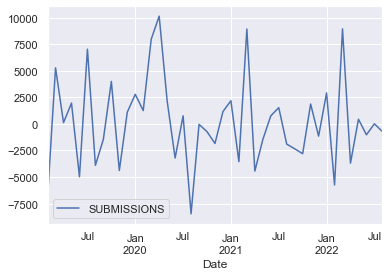

In [62]:
subDiff.plot();

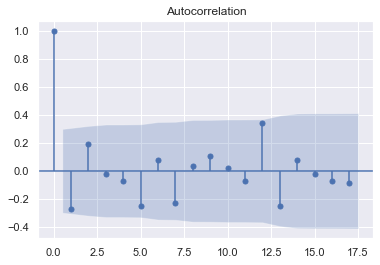

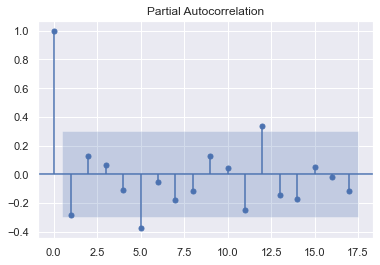

In [63]:
plot_acf(subDiff);
plot_pacf(subDiff);

In [64]:
adfuller(subDiff)[1]

3.866084044772497e-14

# Base model

In [65]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
def arimaModelGenerator(p,q) :  
    model=ARIMA(train,order=(p,1,q));
    modelFit=model.fit();
    print(modelFit.summary());
    residual =modelFit.resid[1:]
    fig,ax=plt.subplots(1,2,figsize=(12,6));
    residual.plot(title='residual',ax=ax[0]);
    residual.plot(title='density',kind='kde',ax=ax[1]);
    prediction=modelFit.forecast(len(test))
    return prediction



c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:            SUBMISSIONS   No. Observations:                   44
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -419.659
Date:                Mon, 06 Mar 2023   AIC                            841.318
Time:                        22:18:30   BIC                            843.079
Sample:                    01-01-2019   HQIC                           841.967
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.716e+07    3.5e+06      4.907      0.000    1.03e+07     2.4e+07
Ljung-Box (L1) (Q):                   3.44   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.06   Pr

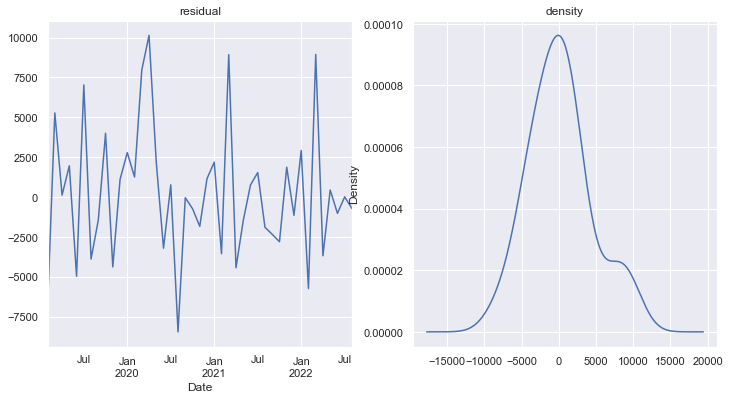

In [67]:
model1pred=arimaModelGenerator(0,0)


# ARIMA(0,1,5)

c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:            SUBMISSIONS   No. Observations:                   44
Model:                 ARIMA(0, 1, 5)   Log Likelihood                -414.689
Date:                Mon, 06 Mar 2023   AIC                            841.379
Time:                        22:18:31   BIC                            851.946
Sample:                    01-01-2019   HQIC                           845.276
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1256      0.114     -1.101      0.271      -0.349       0.098
ma.L2          0.1133      0.182      0.622      0.534      -0.244       0.471
ma.L3          0.0165      0.212      0.078      0.9

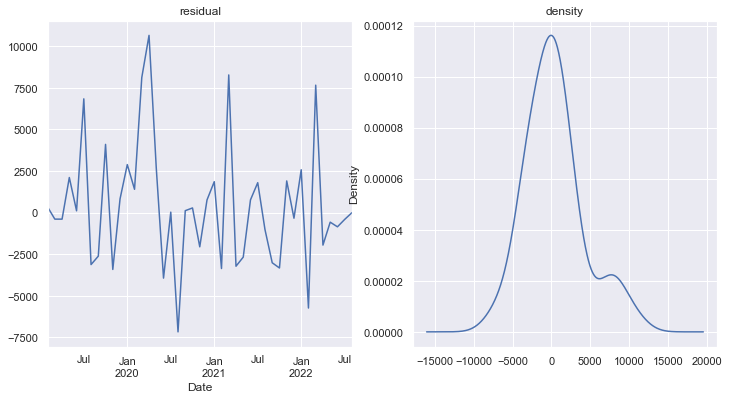

In [68]:
model2pred=arimaModelGenerator(0,5)



In [69]:
list(model2pred)

[67171.66284026204,
 67228.69415439849,
 67311.60527948306,
 67348.55996059187,
 67348.87010990805,
 67348.87010990805]

In [70]:
subCopy.loc[len(train):,'arima(0 1 0)']=model1pred
subCopy.loc[len(train):,'arima(0 1 5)']=model2pred


C:\Users\mpathirana\AppData\Local\Temp\ipykernel_21876\230143575.py:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  subCopy.loc[len(train):,'arima(0 1 0)']=model1pred
C:\Users\mpathirana\AppData\Local\Temp\ipykernel_21876\230143575.py:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  subCopy.loc[len(train):,'arima(0 1 5)']=model2pred


<AxesSubplot:xlabel='Date'>

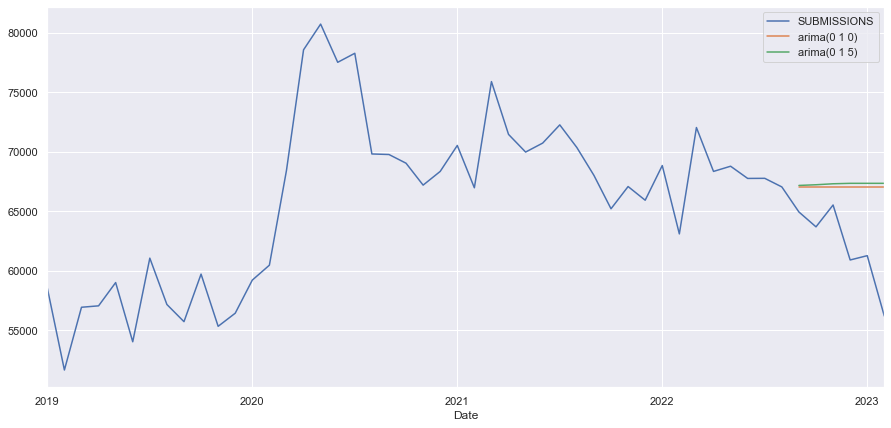

In [71]:
subCopy.plot(figsize=(15,7))

c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:            SUBMISSIONS   No. Observations:                   44
Model:                 ARIMA(1, 1, 5)   Log Likelihood                -414.231
Date:                Mon, 06 Mar 2023   AIC                            842.462
Time:                        22:18:32   BIC                            854.790
Sample:                    01-01-2019   HQIC                           847.008
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5738      0.288     -1.992      0.046      -1.138      -0.009
ma.L1          0.4591      0.279      1.643      0.100      -0.089       1.007
ma.L2          0.0509      0.135      0.376      0.7

2022-09-01    67963.701474
2022-10-01    67529.197290
2022-11-01    67911.303758
2022-12-01    67797.782701
2023-01-01    67764.465898
2023-02-01    67783.583947
Freq: MS, Name: predicted_mean, dtype: float64

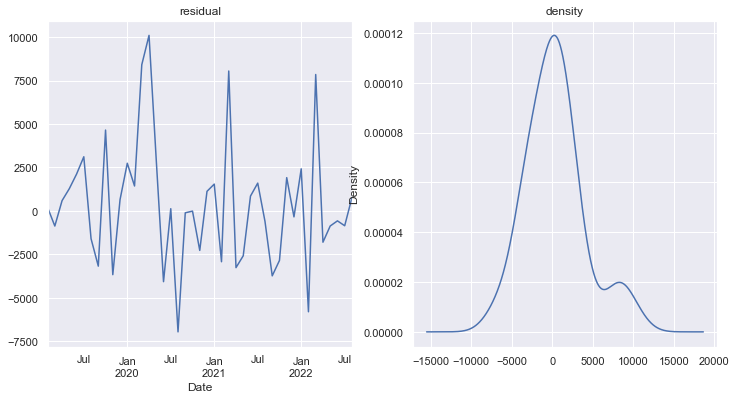

In [72]:
arimaModelGenerator(1,5)


                                      SARIMAX Results                                       
Dep. Variable:                          SUBMISSIONS   No. Observations:                   44
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -303.879
Date:                              Mon, 06 Mar 2023   AIC                            611.759
Time:                                      22:18:33   BIC                            614.627
Sample:                                  01-01-2019   HQIC                           612.694
                                       - 08-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.1170      0.069     -1.694      0.090      -0.252       0.018
sigma2      1.943e+

c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2022-09-01    64957.460162
2022-10-01    62453.615194
2022-11-01    63859.652317
2022-12-01    62976.520294
2023-01-01    65885.075782
2023-02-01    60450.942030
Freq: MS, Name: predicted_mean, dtype: float64

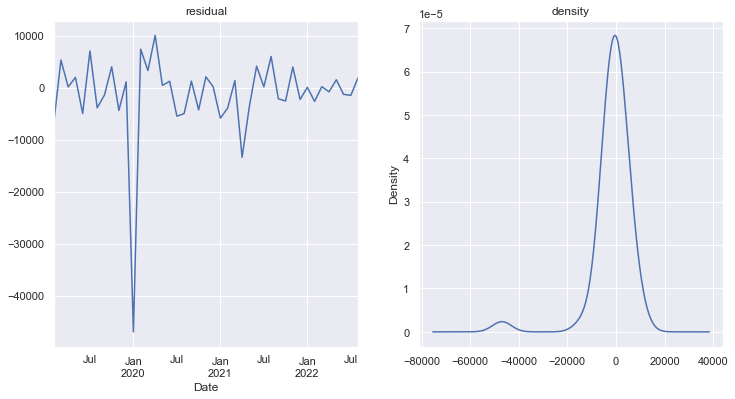

In [73]:
smodel=SARIMAX(train,order=(0,1,0),seasonal_order=(0,1,1,12));
smodelFits=smodel.fit();
print(smodelFits.summary());
sresidual =smodelFits.resid[1:]
fig,ax=plt.subplots(1,2,figsize=(12,6));
sresidual.plot(title='residual',ax=ax[0]);
sresidual.plot(title='density',kind='kde',ax=ax[1]);
prediction=smodelFits.forecast(len(test))
prediction

In [74]:
subCopy.loc[len(train):,'Sarima']=prediction

C:\Users\mpathirana\AppData\Local\Temp\ipykernel_21876\2723411191.py:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  subCopy.loc[len(train):,'Sarima']=prediction


<AxesSubplot:xlabel='Date'>

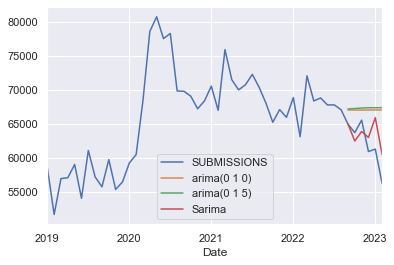

In [75]:
subCopy.plot()

In [76]:
test.index[0]

Timestamp('2022-09-01 00:00:00')

In [77]:
train2=train.copy()
dateRange=pd.date_range(start=test.index[0],end=test.index[-1],freq='MS')
predDf=pd.DataFrame()
for i in range(len(test)):
    smodel=SARIMAX(train2.iloc[i:],order=(0,1,0),seasonal_order=(0,1,0,12));
    smodelFits=smodel.fit();
    prediction=smodelFits.forecast(1)
    predSeries=pd.DataFrame(data={'SUBMISSIONS':prediction},index=[dateRange[i]])
    predDf=predDf.append(predSeries)
    train2=train2.append(predSeries)
    print(train2.tail())

c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mpathirana\AppData\Local\Temp\ipykernel_21876\309043019.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predDf=predDf.append(predSeries)
C:\Users\mpathirana\AppData\Local\Temp\ipykernel_21876\309043019.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train2=train2.append(predSeries)
c:\Users\mpathirana\Anaconda3\lib\site-packages\statsmodels\tsa\base\

            SUBMISSIONS
2022-05-01      68786.0
2022-06-01      67760.0
2022-07-01      67769.0
2022-08-01      67047.0
2022-09-01      64706.0
            SUBMISSIONS
2022-06-01      67760.0
2022-07-01      67769.0
2022-08-01      67047.0
2022-09-01      64706.0
2022-10-01      61901.0
            SUBMISSIONS
2022-07-01      67769.0
2022-08-01      67047.0
2022-09-01      64706.0
2022-10-01      61901.0
2022-11-01      63769.0
            SUBMISSIONS
2022-08-01      67047.0
2022-09-01      64706.0
2022-10-01      61901.0
2022-11-01      63769.0
2022-12-01      62619.0
            SUBMISSIONS
2022-09-01      64706.0
2022-10-01      61901.0
2022-11-01      63769.0
2022-12-01      62619.0
2023-01-01      65533.0
            SUBMISSIONS
2022-10-01      61901.0
2022-11-01      63769.0
2022-12-01      62619.0
2023-01-01      65533.0
2023-02-01      59789.0


In [78]:
predDf=predDf.rename(columns={'SUBMISSIONS':'pred'})
predDf

,pred
2022-09-01,64706.0
2022-10-01,61901.0
2022-11-01,63769.0
2022-12-01,62619.0
2023-01-01,65533.0
2023-02-01,59789.0


In [79]:
pd.concat([subCopy,predDf],axis=1)

,SUBMISSIONS,arima(0 1 0),arima(0 1 5),Sarima,pred
2019-01-01,58547,NaN,NaN,NaN,NaN
2019-02-01,51664,NaN,NaN,NaN,NaN
2019-03-01,56936,NaN,NaN,NaN,NaN
2019-04-01,57055,NaN,NaN,NaN,NaN
2019-05-01,59011,NaN,NaN,NaN,NaN
2019-06-01,54036,NaN,NaN,NaN,NaN
2019-07-01,61063,NaN,NaN,NaN,NaN
2019-08-01,57169,NaN,NaN,NaN,NaN
2019-09-01,55725,NaN,NaN,NaN,NaN
2019-10-01,59721,NaN,NaN,NaN,NaN


<AxesSubplot:>

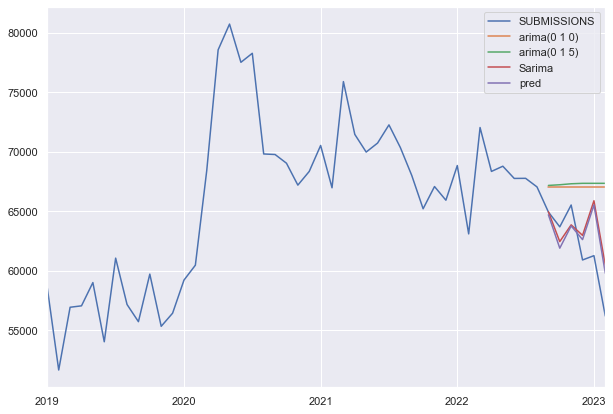

In [80]:
pd.concat([subCopy,predDf],axis=1).plot(figsize=(10,7))

In [81]:
subCopy=pd.concat([subCopy,predDf],axis=1)